# **DL Lab Assignment 3 - YOLO12 Model**
Course Name: Deep Learning

Lab Title: YOLO12 Model on Flank_Yoke Dataset

Student Name: Om Borle

PRN.: 202201040035 ; Roll No.: 13 ; Div.: A1

Group Members: Md Yaseen, Vidya Bingi, Vaibhav Jadhav

Objective:
* To perform defect detection on the Flank_Yoke dataset using deep learning models.

* To preprocess images and annotations for model training.

* To fine-tune a pre-trained object detection model (e.g., YOLO, SSD) for industrial defect detection.

* To evaluate model performance using metrics like IoU and mAP.

* To analyze real-time defect detection and classification results for quality assurance.

* To develop a robust vision-based defect detection system for identifying faults in flank yoke components.

* To improve manufacturing efficiency by automating defect detection in mechanical parts.

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
%cd {HOME}
!yolo task=detect mode=predict model=yolo12s.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 18.1M/18.1M [00:00<00:00, 73.5MB/s]
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,261,840 parameters, 0 gradients, 21.4 GFLOPs

100% 104k/104k [00:00<00:00, 82.8MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 54.7ms
Speed: 12.4ms preprocess, 54.7ms inference, 345.5ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Custom Training

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WXdDGWePf6jCCSvJLl5i")
project = rf.workspace("maskface-swciq").project("sample-project-drkwz")
version = project.version(1)
dataset = version.download("yolov12")




/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Sample-Project-1 in yolov12:: 100%|██████████| 72/72 [00:00<00:00, 6052.51it/s]


In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolo12s.pt data=/content/datasets/Sample-Project-1/data.yaml epochs=100 imgsz=640 plots=True

/content
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo12s.pt, data=/content/datasets/Sample-Project-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [8]:
# Code for Task 4
# Load Trained Model Weights
from ultralytics import YOLO

# Load trained YOLO model
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [9]:
# Run Inference on Test Images
# Inference on a test image
results = model('/content/datasets/Sample-Project-1/test/images/20250222_120244_010_jpg.rf.337a8a168d149e13534a7722a76f0166.jpg', save=True, conf=0.5)  # Save output with bounding boxes



image 1/1 /content/datasets/Sample-Project-1/test/images/20250222_120244_010_jpg.rf.337a8a168d149e13534a7722a76f0166.jpg: 640x640 2 objects, 20.9ms
Speed: 3.1ms preprocess, 20.9ms inference, 152.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


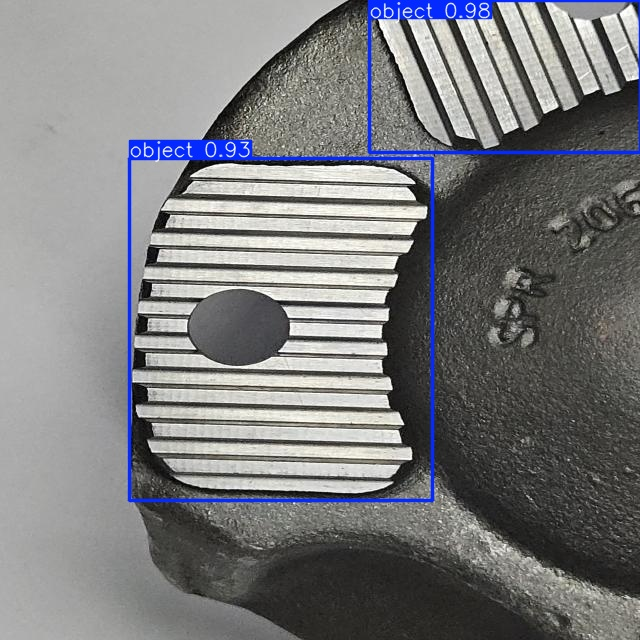

In [10]:
from IPython.display import Image as IPyImage, display

display(IPyImage("/content/runs/detect/predict2/20250222_120244_010_jpg.rf.337a8a168d149e13534a7722a76f0166.jpg", width=1000))

In [11]:
# Inference on a test image
results = model('/content/datasets/Sample-Project-1/test/images/20250222_120244_027_jpg.rf.cc601d060663b5039d0cd912f3849743.jpg', save=True, conf=0.5)  # Save output with bounding boxes


image 1/1 /content/datasets/Sample-Project-1/test/images/20250222_120244_027_jpg.rf.cc601d060663b5039d0cd912f3849743.jpg: 640x640 2 objects, 21.7ms
Speed: 3.1ms preprocess, 21.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


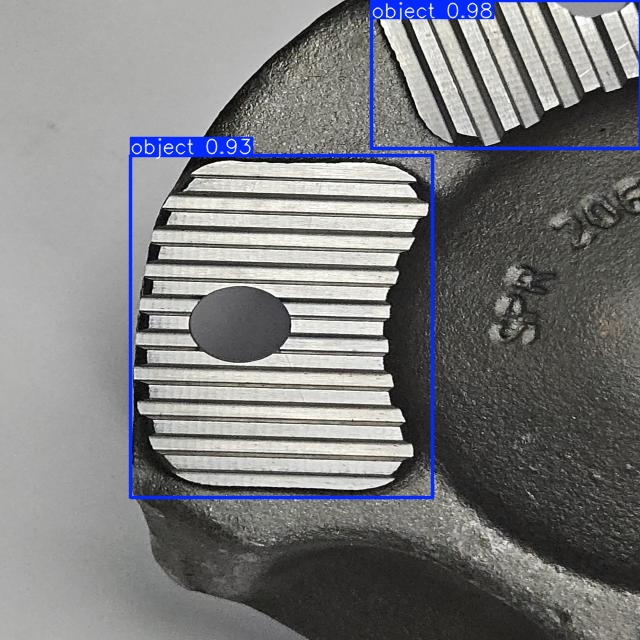

In [12]:
display(IPyImage("/content/runs/detect/predict2/20250222_120244_027_jpg.rf.cc601d060663b5039d0cd912f3849743.jpg", width=1000))

In [13]:
# Evaluate model performance
metrics = model.val()  # Evaluates on validation dataset from data.yaml

# Mean Average Precision
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")

# Mean Precision and Recall (use as properties, NOT methods)
precision = metrics.box.mp
recall = metrics.box.mr
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall + 1e-6)
print(f"F1 Score: {f1_score:.4f}")


Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/datasets/Sample-Project-1/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]


                   all          2          4      0.989          1      0.995      0.995
Speed: 0.4ms preprocess, 42.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
mAP@0.5: 0.9950
mAP@0.5:0.95: 0.9950
Precision: 0.9894
Recall: 1.0000
F1 Score: 0.9947


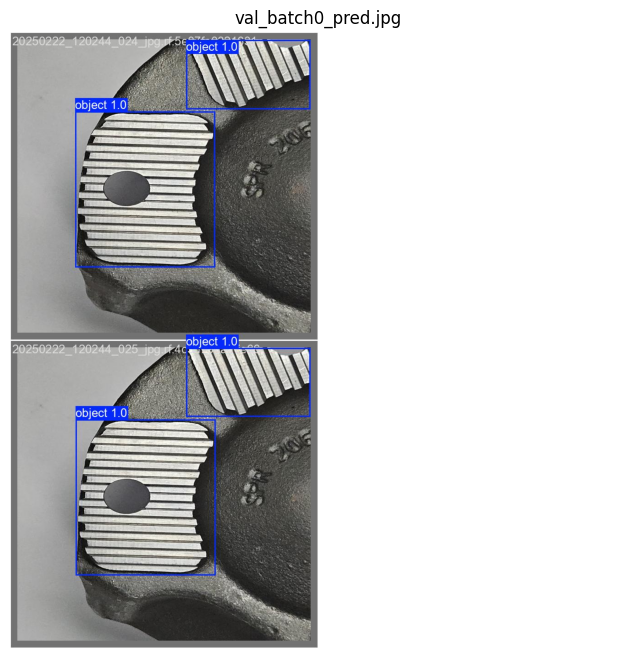

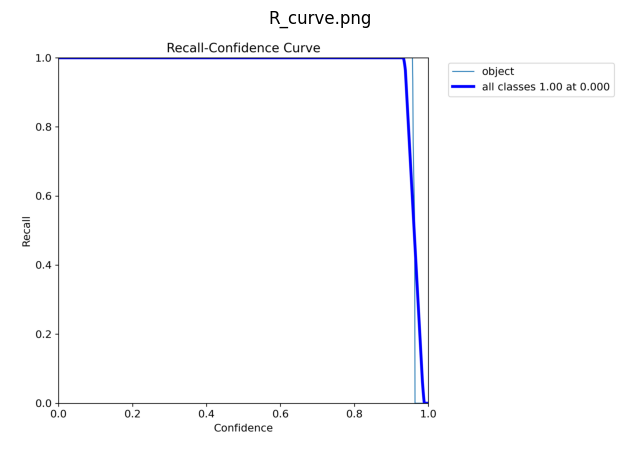

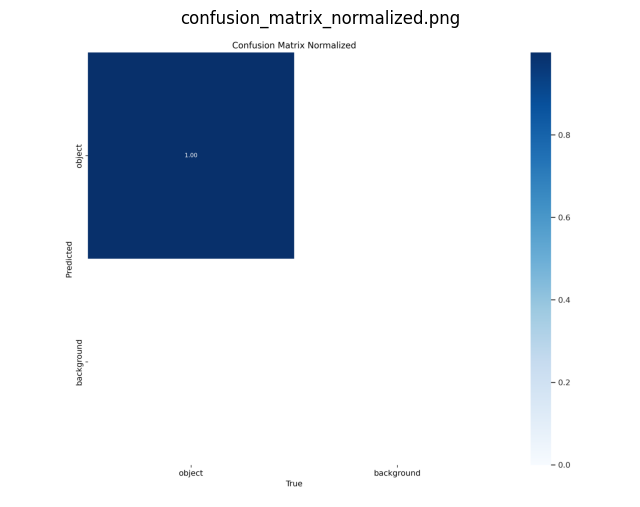

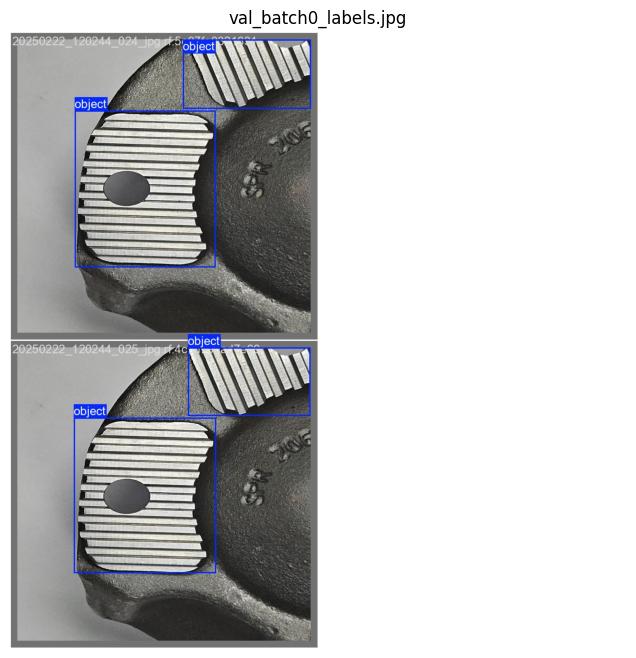

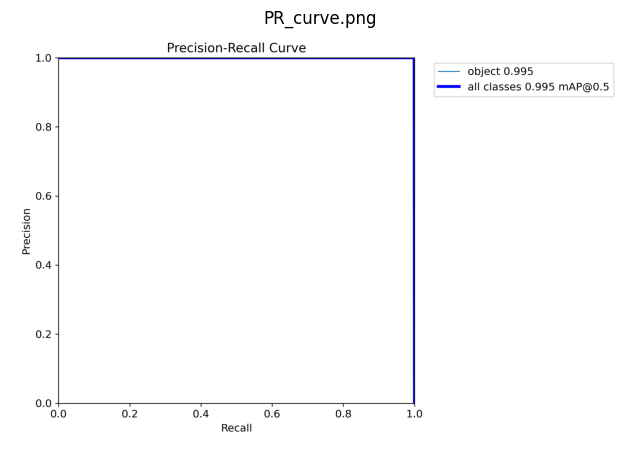

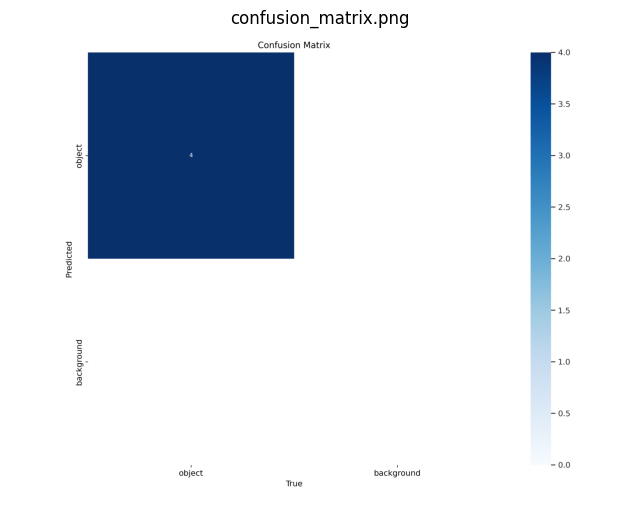

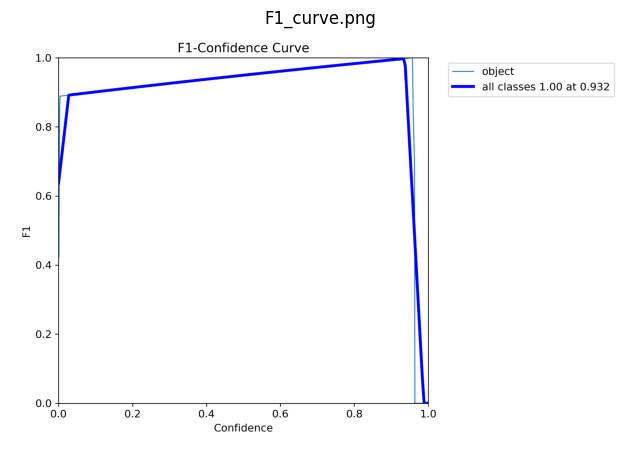

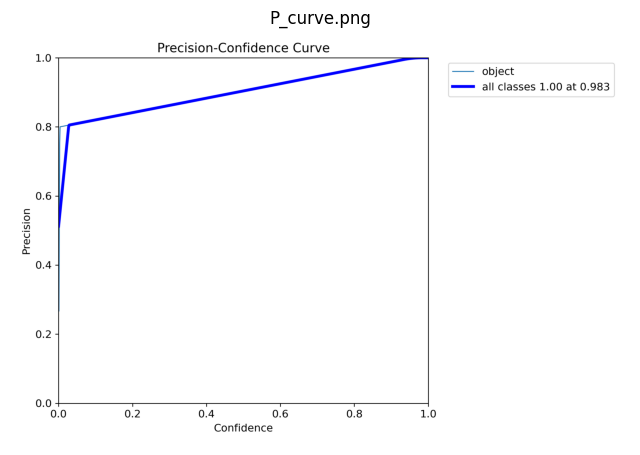

In [14]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the val3 folder
folder_path = '/content/runs/detect/val'

# List all image files (you can filter for .png, .jpg, etc.)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Loop through and display each image
for img_file in image_files:
    img_path = os.path.join(folder_path, img_file)
    img = Image.open(img_path)

    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')
    plt.show()
